# K均值算法（K-means）聚类

## 【关键词】K个种子，均值

In [ ]:
之前的算法：X_train(数据)----->y_train(目标值): 监督式学习，目标明确
    
K-means无监督，自学    

## 一、K-means算法原理

### 聚类的概念：一种无监督的学习，事先不知道类别，自动将相似的对象归到同一个簇中。

K-Means算法是一种聚类分析（cluster analysis）的算法，其主要是来计算数据聚集的算法，主要通过不断地取离种子点最近均值的算法。

K-Means算法主要解决的问题如下图所示。我们可以看到，在图的左边有一些点，我们用肉眼可以看出来有四个点群，但是我们怎么通过计算机程序找出这几个点群来呢？于是就出现了我们的K-Means算法

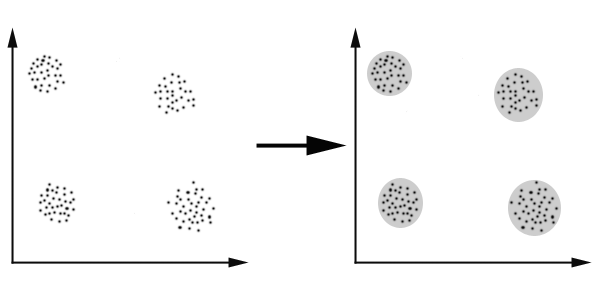

这个算法其实很简单，如下图所示：

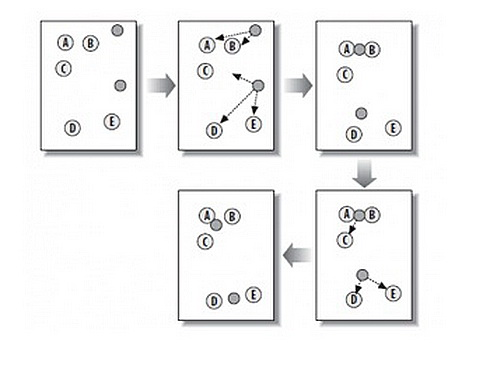

从上图中，我们可以看到，A，B，C，D，E是五个在图中点。而灰色的点是我们的种子点，也就是我们用来找点群的点。有两个种子点，所以K=2。

然后，K-Means的算法如下：

1. 随机在图中取K（这里K=2）个种子点。
2. 然后对图中的所有点求到这K个种子点的距离，假如点Pi离种子点Si最近，那么Pi属于Si点群。（上图中，我们可以看到A，B属于上面的种子点，C，D，E属于下面中部的种子点）
3. 接下来，我们要移动种子点到属于他的“点群”的中心。（见图上的第三步）
4. 然后重复第2）和第3）步，直到，种子点没有移动（我们可以看到图中的第四步上面的种子点聚合了A，B，C，下面的种子点聚合了D，E）。

这个算法很简单，重点说一下“求点群中心的算法”：欧氏距离（Euclidean Distance）：差的平方和的平方根

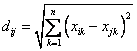


### K-Means主要最重大的缺陷——都和初始值有关：

K是事先给定的，这个K值的选定是非常难以估计的。很多时候，事先并不知道给定的数据集应该分成多少个类别才最合适。（ISODATA算法通过类的自动合并和分裂，得到较为合理的类型数目K）

K-Means算法需要用初始随机种子点来搞，这个随机种子点太重要，不同的随机种子点会有得到完全不同的结果。（K-Means++算法可以用来解决这个问题，其可以有效地选择初始点）

### 总结：K-Means算法步骤：

1. 从数据中选择k个对象作为初始聚类中心;
2. 计算每个聚类对象到聚类中心的距离来划分；
3. 再次计算每个聚类中心
4. 计算标准测度函数，直到达到最大迭代次数，则停止，否则，继续操作。
5. 确定最优的聚类中心

### K-Means算法应用

看到这里，你会说，K-Means算法看来很简单，而且好像就是在玩坐标点，没什么真实用处。而且，这个算法缺陷很多，还不如人工呢。是的，前面的例子只是玩二维坐标点，的确没什么意思。但是你想一下下面的几个问题：

1）如果不是二维的，是多维的，如5维的，那么，就只能用计算机来计算了。

2）二维坐标点的X，Y 坐标，其实是一种向量，是一种数学抽象。现实世界中很多属性是可以抽象成向量的，比如，我们的年龄，我们的喜好，我们的商品，等等，能抽象成向量的目的就是可以让计算机知道某两个属性间的距离。如：我们认为，18岁的人离24岁的人的距离要比离12岁的距离要近，鞋子这个商品离衣服这个商品的距离要比电脑要近，等等。

## 二、实战

重要参数：
- n_clusters：聚类的个数

重要属性：
- cluster_centers_ : [n_clusters, n_features]的数组，表示聚类中心点的坐标
- labels_ : 每个样本点的标签


### 1、聚类实例

导包，使用make_blobs生成随机点cluster_std

In [1]:
import numpy as np
#随机生成点
from sklearn.datasets import make_blobs

#K-means:k均值聚类 cluster(一簇，一类)
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
X_train,y_train = make_blobs(n_samples=150,centers=3,cluster_std=1)
display(X_train, y_train)

array([[ -1.02685742,  -1.70580518],
       [ -1.51262184,  -2.07285663],
       [ -2.08239808,  -1.64254885],
       [ -5.80038329,   3.92915209],
       [ -1.37983727,  -2.78251174],
       [ -7.64450761,   5.41940349],
       [ -6.97753633,   4.18361356],
       [  0.17137586,  -1.76936527],
       [ -7.68431096,   5.40566134],
       [ -6.51686016,   5.4725472 ],
       [-10.7776541 ,  -5.29512099],
       [ -8.49796588,   4.83436032],
       [ -2.04364472,  -4.17608123],
       [-10.34654525,  -5.76667369],
       [ -3.48328623,  -1.23714163],
       [-10.36706805,  -4.99292028],
       [ -9.43547248,  -6.78458232],
       [ -1.93493572,  -2.9001921 ],
       [ -0.91426147,  -3.87226185],
       [ -6.74143807,   3.85763601],
       [-10.52372621,  -5.78227137],
       [ -9.98732026,  -6.57779218],
       [ -7.14329294,   4.07328244],
       [ -0.64607775,  -3.4315825 ],
       [  0.17264696,  -2.08369521],
       [-10.51973592,  -6.01490502],
       [ -7.36183968,  -4.8815414 ],
 

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 2, 1, 0, 2, 0, 2, 2, 0, 0, 1, 2, 2,
       1, 0, 0, 2, 2, 0, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 0, 1, 0,
       0, 0, 0, 2, 2, 0, 1, 2, 0, 2, 0, 1, 1, 2, 0, 2, 1, 1, 2, 0, 0, 2,
       2, 0, 0, 0, 2, 0, 1, 0, 1, 2, 0, 2, 2, 2, 1, 2, 1, 0, 0, 2, 1, 2,
       1, 2, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 0, 0, 2, 0, 2, 1, 0, 1, 0,
       0, 2, 0, 0, 1, 0, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2,
       1, 1, 2, 1, 1, 0, 1, 0, 2, 0, 0, 2, 1, 2, 2, 2, 1, 1])

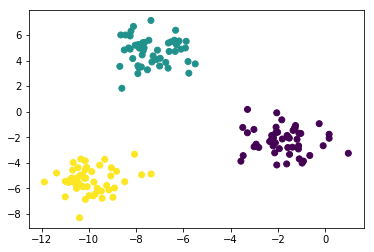

In [6]:
plt.scatter(X_train[:,0],X_train[:,1],c = y_train)

建立模型,训练数据，并进行数据预测，使用相同数据

In [8]:
#Knn ’邻居‘
#Kmeans k == 打算将数据分成积累
kmeans = KMeans(n_clusters=3)

In [9]:
#无监督学习，没有目标，自学成才，根据距离，自动分类
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

无监督的情况下进行计算，预测
现在机器学习没有目标

In [10]:
y_ = kmeans.predict(X_train)

绘制图形，显示聚类结果kmeans.cluster_centers

In [11]:
y_

array([2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 0, 1, 2, 0, 2, 0, 0, 2, 2, 1, 0, 0,
       1, 2, 2, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 2,
       2, 2, 2, 0, 0, 2, 1, 0, 2, 0, 2, 1, 1, 0, 2, 0, 1, 1, 0, 2, 2, 0,
       0, 2, 2, 2, 0, 2, 1, 2, 1, 0, 2, 0, 0, 0, 1, 0, 1, 2, 2, 0, 1, 0,
       1, 0, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 2, 2, 0, 2, 0, 1, 2, 1, 2,
       2, 0, 2, 2, 1, 2, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 2, 1, 2, 0, 2, 2, 0, 1, 0, 0, 0, 1, 1], dtype=int32)

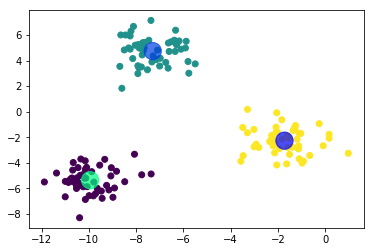

In [13]:
#y_train数据不存在
#无监督学习Kmeans求得了类别：y_
plt.scatter(X_train[:,0],X_train[:,1],c = y_)

cluster_centers_ = kmeans.cluster_centers_

plt.scatter(cluster_centers_[:,0],cluster_centers_[:,1],s = 300,alpha = 0.7,c = [-2,1,2],
            cmap = plt.cm.winter_r)

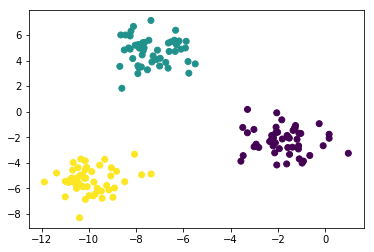

In [12]:
#原始的数据结果：
plt.scatter(X_train[:,0],X_train[:,1],c = y_train)

### 2、 实战，三问中国足球几多愁？

导包，3D图像需导包：from mpl_toolkits.mplot3d import Axes3D  
读取数据

In [14]:
from mpl_toolkits.mplot3d import Axes3D

In [15]:
import pandas as pd

from pandas import Series,DataFrame

In [16]:
ball = pd.read_csv('../data/AsiaFootball.txt',header=None)
ball

,0,1,2,3
0,中国,50,50,9
1,日本,28,9,4
2,韩国,17,15,3
3,伊朗,25,40,5
4,沙特,28,40,2
5,伊拉克,50,50,1
6,卡塔尔,50,40,9
7,阿联酋,50,40,9
8,乌兹别克斯坦,40,40,5
9,泰国,50,50,9


列名修改为："国家","2006世界杯","2010世界杯","2007亚洲杯"

In [17]:
ball.columns = ["国家","2006世界杯","2010世界杯","2007亚洲杯"]
ball

,国家,2006世界杯,2010世界杯,2007亚洲杯
0,中国,50,50,9
1,日本,28,9,4
2,韩国,17,15,3
3,伊朗,25,40,5
4,沙特,28,40,2
5,伊拉克,50,50,1
6,卡塔尔,50,40,9
7,阿联酋,50,40,9
8,乌兹别克斯坦,40,40,5
9,泰国,50,50,9


使用K-Means进行数据处理，对亚洲球队进行分组，分三组

In [18]:
kmeans = KMeans(3)

In [19]:
kmeans.fit(ball[["2006世界杯","2010世界杯","2007亚洲杯"]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [20]:
y_ = kmeans.predict(ball[["2006世界杯","2010世界杯","2007亚洲杯"]])
y_

array([0, 1, 1, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0], dtype=int32)

for循环打印输出分组后的球队，argwhere()

In [21]:
np.argwhere(y_ == 1)

array([[1],
       [2]])

In [29]:
for i in range(3):
    
    index = np.argwhere(y_ == i)
    
    for i, in index:
        print(ball['国家'][i],end = ' ')
    print('\n')

中国 伊拉克 卡塔尔 阿联酋 泰国 越南 阿曼 印尼 

日本 韩国 

伊朗 沙特 乌兹别克斯坦 巴林 朝鲜 



绘制三维立体图形,ax = plt.subplot(projection  = '3d')  
ax.scatter3D()

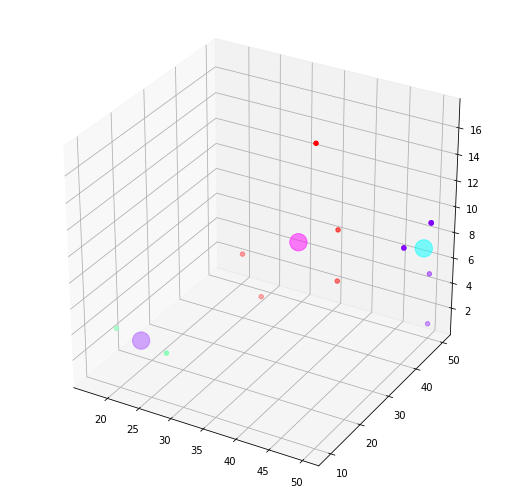

In [30]:
plt.figure(figsize=(9,9))
axes3d = plt.subplot(projection = '3d')

axes3d.scatter3D(ball['2006世界杯'],ball['2010世界杯'],ball['2007亚洲杯'],c = y_,cmap = 'rainbow')

cluster_centers_ = kmeans.cluster_centers_

axes3d.scatter3D(cluster_centers_[:,0],cluster_centers_[:,1],cluster_centers_[:,2],
                 c = [-1,3,5],cmap = plt.cm.cool,s = 300,alpha = 0.5)

### 3、聚类实践与常见错误

导包，使用make_blobs创建样本点

In [31]:
import numpy as np
from sklearn.cluster import KMeans

import sklearn.datasets as datasets

import matplotlib.pyplot as plt
%matplotlib inline


第一种错误，k值不合适，make_blobs默认中心点三个

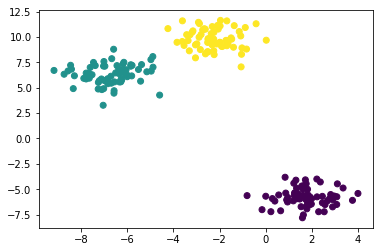

In [32]:
X_train,y_train = datasets.make_blobs(n_samples=200,centers=3)

plt.scatter(X_train[:,0],X_train[:,1],c = y_train)

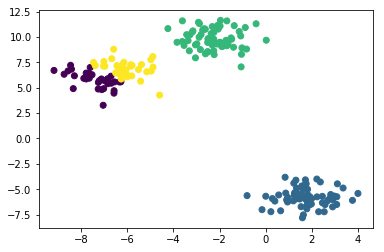

In [33]:
kmeans = KMeans(4)
y_ = kmeans.fit(X_train).predict(X_train)
plt.scatter(X_train[:,0],X_train[:,1],c = y_)

第二种错误,数据偏差  
trans = [[0.6,-0.6],[-0.4,0.8]]  
X2 = np.dot(X,trans)

In [6]:
X_train.shape

(200, 2)

(200, 2)

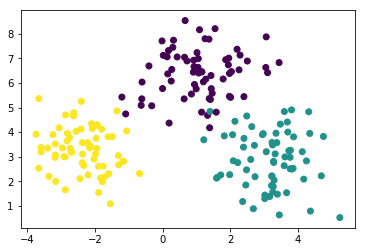

In [11]:
X_train,y_train = datasets.make_blobs(n_samples=200,centers=3)

plt.scatter(X_train[:,0],X_train[:,1],c = y_train)

bias = [[0.6,-0.6],[-0.4,0.8]]
X_data = np.dot(X_train,bias)
X_data.shape

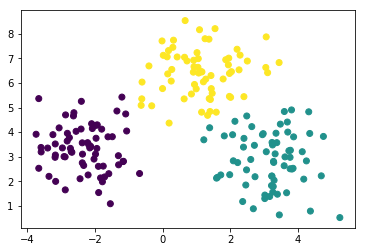

In [14]:
kmeans = KMeans(3)
y_ = kmeans.fit(X_train).predict(X_train)
plt.scatter(X_train[:,0],X_train[:,1],c = y_)

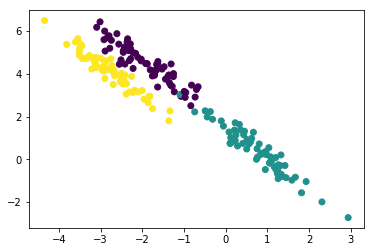

In [12]:
plt.scatter(X_data[:,0],X_data[:,1],c = y_train)

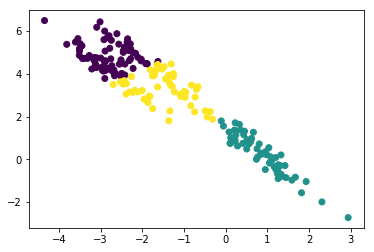

In [13]:
kmeans = KMeans(3)
y_ = kmeans.fit(X_data).predict(X_data)
plt.scatter(X_data[:,0],X_data[:,1],c = y_)

第三个错误:标准偏差不相同cluster_std

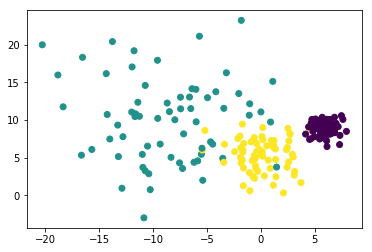

In [15]:
X_train,y_train = datasets.make_blobs(n_samples=200,centers=3,cluster_std=[1,5,2])
plt.scatter(X_train[:,0],X_train[:,1],c = y_train)

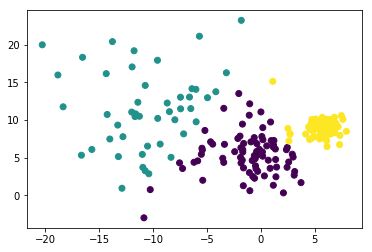

In [16]:
kmeans = KMeans(3)

y_ = kmeans.fit(X_train).predict(X_train)

plt.scatter(X_train[:,0],X_train[:,1],c = y_)

第四个错误：样本数量不同

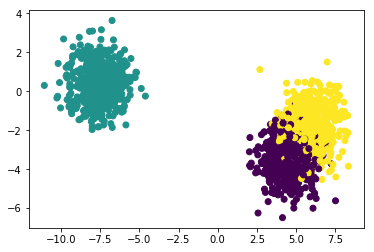

In [34]:
X_train,y_train = datasets.make_blobs(n_samples=1500,centers=3)
plt.scatter(X_train[:,1],X_train[:,0],c = y_train)

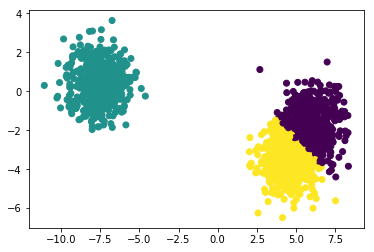

In [35]:
kmeans = KMeans(3)
y_ = kmeans.fit(X_train).predict(X_train)
plt.scatter(X_train[:,1],X_train[:,0],c = y_)

In [31]:
index_0 = np.argwhere(y_train == 0)

data_0 = X_train[index_0.reshape((500))]


index_1 = np.argwhere(y_train == 1)[:100]

data_1 = X_train[index_1.reshape((100))]


index_2 = np.argwhere(y_train == 2)[:50]

data_2 = X_train[index_2.reshape((50))]

X_train = np.concatenate((data_0,data_1,data_2))

y_train = [0]*500+[1]*100+[2]*50

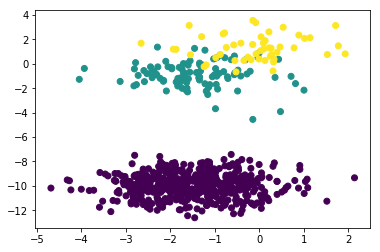

In [32]:
plt.scatter(X_train[:,1],X_train[:,0],c = y_train)

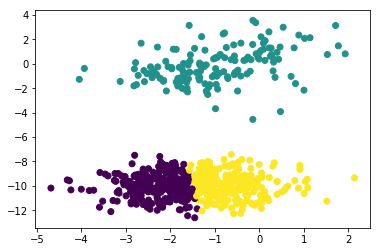

In [33]:
kmeans = KMeans(3)
y_ = kmeans.fit(X_train).predict(X_train)

plt.scatter(X_train[:,1],X_train[:,0],c = y_)

### 4、K-Means图片颜色点分类

In [94]:
a = np.array([0,2,-3,8])
np.argmin(a)

np.argwhere(a>=2)

array([[1],
       [3]])

导包from sklearn.metrics import pairwise_distances_argmin

In [49]:
from sklearn.datasets import load_sample_image

china = load_sample_image('china.jpg')
china.shape

(427, 640, 3)

In [50]:
#这张图片中有273280个点（红绿蓝）
427*640

273280

In [51]:
X_train = china.reshape((-1,3)) # -1 代表前面的维度都合并
X_train.shape

(273280, 3)

In [52]:
import pandas as pd
df = pd.DataFrame(X_train)
df.shape
df.head()

unique = df.drop_duplicates()

#图片有273280个像素点，96615个不同颜色值
unique.shape

(96615, 3)

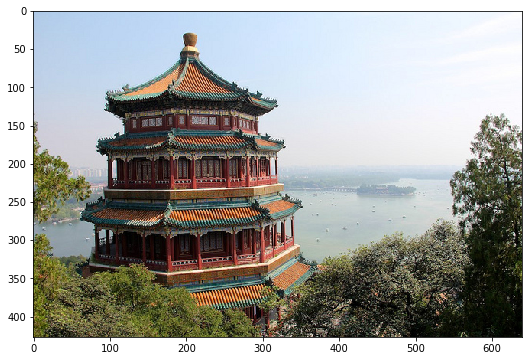

In [39]:
plt.figure(figsize=(9,6))
plt.imshow(china)

In [53]:
#原始图片大小是550kb
plt.imsave('china_orginal.png',china)

In [54]:

#将96615个颜色 提取出主要一些颜色 64个主要的颜色
color_cluster = 64
kmeans = KMeans(color_cluster)

In [55]:
X_train.shape

(273280, 3)

In [56]:
X_train[:100]

array([[174, 201, 231],
       [174, 201, 231],
       [174, 201, 231],
       [174, 201, 231],
       [174, 201, 231],
       [174, 201, 231],
       [174, 201, 231],
       [174, 201, 231],
       [173, 202, 232],
       [172, 201, 231],
       [172, 201, 231],
       [173, 202, 232],
       [172, 201, 231],
       [172, 201, 231],
       [172, 201, 231],
       [174, 203, 233],
       [175, 204, 234],
       [174, 203, 233],
       [173, 202, 232],
       [174, 203, 233],
       [176, 203, 233],
       [176, 203, 233],
       [175, 202, 232],
       [176, 203, 233],
       [177, 204, 234],
       [177, 204, 234],
       [176, 203, 233],
       [176, 203, 233],
       [176, 203, 233],
       [177, 204, 234],
       [177, 204, 234],
       [177, 204, 234],
       [178, 205, 235],
       [177, 204, 234],
       [177, 204, 234],
       [179, 206, 236],
       [180, 207, 237],
       [179, 206, 236],
       [178, 205, 235],
       [178, 205, 235],
       [178, 205, 235],
       [179, 206

In [57]:
#如果不进行处理，时间太长
y_ = kmeans.fit(X_train).predict(X_train)

KeyboardInterrupt: 

In [57]:
#shuffle随机打乱数据的顺序

from sklearn.utils import shuffle


In [58]:
X_train_shuffle = shuffle(X_train)

In [59]:
X_train_shuffle.shape

(273280, 3)

In [60]:
kmeans.fit(X_train_shuffle[:1000])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=64, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [61]:
y_ = kmeans.predict(X_train)

In [62]:
y_

array([32, 32, 32, ...,  7, 24, 53], dtype=int32)

In [63]:
#从随机的1000个点中，选取的主要的64个点
#kmeans算法，将1000个点64份，cluster_centers是64簇点的中心位置
main_color_ = kmeans.cluster_centers_
main_color_

array([[205.        , 144.33333333, 106.33333333],
       [ 31.        ,  11.86666667,   9.26666667],
       [216.6       , 234.35      , 252.725     ],
       [122.83333333,  99.33333333,  54.        ],
       [186.5       , 198.5625    , 202.0625    ],
       [ 66.83333333,  64.25      ,  61.5       ],
       [146.25      , 140.875     , 128.1875    ],
       [ 48.72413793,  45.89655172,  39.75862069],
       [232.        , 242.56862745, 253.8627451 ],
       [192.66666667, 215.17777778, 241.51111111],
       [ 85.76923077,  88.30769231,  74.92307692],
       [182.96153846, 190.26923077, 183.96153846],
       [  5.36      ,   4.76      ,   1.92      ],
       [107.53333333,  55.8       ,  34.13333333],
       [116.66666667, 112.58333333, 102.66666667],
       [208.17391304, 209.        , 212.60869565],
       [147.8       , 162.4       , 169.2       ],
       [232.30769231, 231.23076923, 231.11538462],
       [242.20408163, 244.79591837, 250.42857143],
       [ 35.08333333,  59.5    

加载图片/创建模型/训练数据/获取labels

使用pairwise_distances_argmin算法生成随机labels

创造方法，重新合成图片

In [69]:
y_.shape

(273280,)

In [70]:
w = 427
h = 640
w*h

273280

In [64]:
def re_create_image(main_color,labels,w,h,d):
    
    #创建了空白的图片
    image = np.ones((w,h,d))
    
    #定义了索引
    inds = 0
    
    #图片的宽度
    for i in range(w):
        #图片高度的方向上进行for循环
        for j in range(h):
            
            #标签的索引值
            index = labels[inds]
            
            color = main_color[index]
            
            image[i][j] = color
            
            inds += 1
            
    return image

In [68]:
image_new = re_create_image(main_color_,y_,427,640,3)

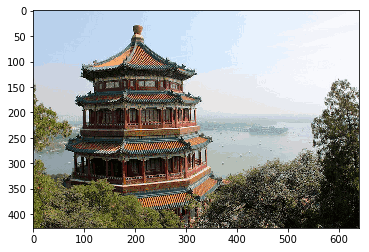

In [73]:
plt.imshow(image_new.astype('float')/255)

In [79]:
china.shape

(427, 640, 3)

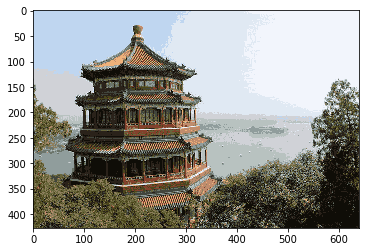

In [78]:
X_train_float = X_train.astype('float')/255
#有顺序
X_train_float

X_train_float_shuffle = shuffle(X_train_float)

kmeans = KMeans(16)

kmeans.fit(X_train_float_shuffle[:1000])

#预测
labels_ = kmeans.predict(X_train_float)

#返回聚类的中心点64
main_colors_ = kmeans.cluster_centers_

w,h,d = china.shape

# china_new = re_create_image(main_colors_,labels_,w,h,d)

#main_colors_[labels_]  == 创建生成图片的方法
image_new = main_colors_[labels_]

image_new.shape

plt.imshow(image_new.reshape((427,640,3)))


In [79]:
#numpy强大之处
a = np.array([3,4,8,9]) # 0,1,2,3

labels = np.array([0,1,0,2,1,3,0,1,2,3,3,2,1,0])

a[labels]

array([3, 4, 3, 8, 4, 9, 3, 4, 8, 9, 9, 8, 4, 3])

In [80]:
plt.imsave('china_new_16.png',china_new)

NameError: name 'china_new' is not defined

In [81]:
plt.imshow(china_new)

NameError: name 'china_new' is not defined

In [88]:
plt.imshow(china_new)

NameError: name 'china_new' is not defined

数据可视化

In [76]:
#对比，随机获取像素点64个
from sklearn.metrics import pairwise_distances_argmin

In [83]:
random_color_ = shuffle(X_train_float)[:64]

In [84]:
random_color_.shape
#索引0~63

(64, 3)

In [85]:
#根据64个点，将273280个进行距离测量

labels_ = pairwise_distances_argmin(X_train_float,random_color_)
labels_.shape

(273280,)

In [86]:
labels_[1000:1200]

array([46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46,
       46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46,
       46, 10, 10, 10, 10, 46, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 32, 32, 32, 32, 32, 32, 32,  1, 32,
       32, 32, 32, 32, 32, 32,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
        1, 25, 25, 25,  1,  1,  1, 25,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       25, 25,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 25, 25, 25, 25, 25, 25,
       25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25])

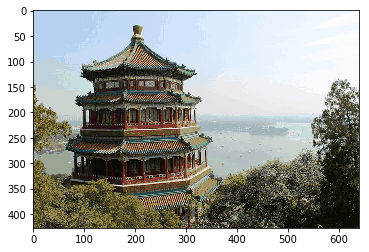

In [87]:
image_random = re_create_image(random_color_,labels_,w,h,d)
plt.imshow(image_random)

## 三、作业

### 1、分析ex7data2.mat文件

找出最佳聚类数目，并画出聚类的中心点

`
from scipy.io import loadmat
from sklearn.cluster import KMeans
data = loadmat('../data/ex7data2.mat')
X = data['X']
X.shape
`

### 2、图片压缩

使用聚类压缩图片

`
img = plt.imread('../data/bird_small.png')
img_shape = img.shape
img_shape
`